# New LS 220916 FINAL

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from scipy.stats import f

pd.set_option('Display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
# dfReg = pd.read_excel("./교수님 전달 파일/0914 datafile excluded version.xlsx", sheet_name=None, header = 4)
dfReg = pd.read_excel("./교수님 전달 파일/0915 datafile excluded version dmaintain.xlsx", sheet_name=None, header = 4)

In [3]:
dfReg.keys()

dict_keys(['2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년'])

In [4]:
raw = pd.concat(dfReg, ignore_index=True)

In [5]:
df_raw = raw[['낙찰율(예대)','연도','기초금액','1순위투찰금액','업체수','담합','점검정비','공고명','공고번호','감정']]
df_raw.head(3)

,낙찰율(예대),연도,기초금액,1순위투찰금액,업체수,담합,점검정비,공고명,공고번호,감정
0,0.98573,2011,1667277480,1654180000,3,0,0,동부엔바이로 탈수슬러지 위탁처리 용역 [공가],2011-0004,NaN
1,0.99842,2011,1667277480,1654180000,2,0,0,(재공고)동부엔바이로 탈수슬러지 위탁처리 용역 [공가],2011-0022,NaN
2,0.77106,2011,1514040000,1176800000,3,0,0,"서울시 양재대로 수도권 2,3단계 관로이설공사 책임감리용역",2010-1774,감정


In [6]:
df_raw['점검정비'].sum()

58

In [7]:
df_raw.tail(3)

,낙찰율(예대),연도,기초금액,1순위투찰금액,업체수,담합,점검정비,공고명,공고번호,감정
598,NaN,2021,2110804300,0,0,0,0,김천시 지방상수도 현대화사업 유지관리시스템 구축 용역 (긴급공고) [급][제한][공...,20211118019-00,NaN
599,0.80242,2021,3538007000,2862260000,3,0,0,문경시 지방상수도 현대화사업 유지관리시스템 구축 용역 [제한][공가],B5202104324,NaN
600,0.83543,2021,2062000000,1734700000,2,0,0,금강남부권(2차) 급수체계조정사업 기본 및 실시설계용역 [공가][PQ],B5202104219,NaN


In [8]:
df_raw['담합'].sum() ,df_raw['점검정비'].sum() # 30 & 44 ok

(30, 58)

In [9]:
df_raw.isna().sum()

낙찰율(예대)     17
연도           0
기초금액         0
1순위투찰금액      0
업체수          0
담합           0
점검정비         0
공고명          0
공고번호         0
감정         525
dtype: int64

In [10]:
df_raw.loc[(df_raw['점검정비'] == 1) & (df_raw['담합'] == 0) & (df_raw['연도'] != 2018)]

,낙찰율(예대),연도,기초금액,1순위투찰금액,업체수,담합,점검정비,공고명,공고번호,감정
114,0.88008,2013,2120679000,1870000000,2,0,1,발전통합운영시스템 점검정비 용역 [공가][PQ],2013-2242,NaN
153,0.77231,2015,11263076000,8667054000,2,0,1,수도 및 댐보시설 점검정비용역(제7권역) [정][제한][공가][PQ],2015-1021,NaN
171,0.67048,2015,2137534902,1442100000,3,0,1,발전통합운영시스템 점검정비 용역 [제한][공가],2015-2590,NaN
195,0.76228,2016,37480949000,28668709378,2,0,1,수도 및 댐.보시설 점검정비용역(제1권역) [제한][공가][PQ],2016-3954,NaN
196,0.76306,2016,34433058000,26320629535,2,0,1,수도 및 댐.보시설 점검정비용역(제2권역) [공가][PQ],2016-3957,NaN
204,0.77821,2016,23107194000,17986364000,2,0,1,수도 및 댐.보시설 점검정비용역(제4권역) [제한][공가][PQ],2016-4776,NaN
205,0.77602,2016,27371223000,21203534000,2,0,1,수도 및 댐.보시설 점검정비용역(제5권역) [제한][공가][PQ],2016-4777,NaN
206,0.77751,2016,13463494000,10481812000,2,0,1,수도 및 댐.보시설 점검정비용역(제6권역) [제한][PQ],2016-4779,NaN
232,0.80759,2017,1026265000,836000000,2,0,1,2017~2018년 수도 ICT 점검정비 용역(한강권역) [공가],2017-0856,NaN
233,0.82664,2017,1476076000,1224500000,2,0,1,2017~2018년 수도 ICT 점검정비 용역(금·영·섬권역) [공가],2017-0857,NaN


### 0. 유찰된 데이터 제거 및 확인

In [11]:
df_temp1 = df_raw.loc[(df_raw['1순위투찰금액'] != 0) & (df_raw['낙찰율(예대)'].isna() != True), ['낙찰율(예대)','연도', '기초금액', '업체수', '담합', '점검정비','공고명','감정']]
df_temp1.head(3)
df_temp1.shape
df_temp1['담합'].sum() # 28

30

In [12]:
df_temp1 = df_temp1.loc[(~(df_temp1['감정'].isna())) | (df_temp1['점검정비']==1), df_temp1.columns != '감정']
df_temp1.shape

(134, 7)

In [13]:
df_temp1['점검정비'].sum()

58

In [14]:
df_temp1.loc[((df_temp1['담합'] == 1) & (df_temp1['낙찰율(예대)'] > 0.9))]

,낙찰율(예대),연도,기초금액,업체수,담합,점검정비,공고명
56,0.90325,2012,4123000000,2,1,1,(재공고)지하수 관측망 점검정비 용역(12~13) [공가][PQ]
131,0.90351,2014,4181900000,2,1,1,지하수 관측망 점검정비(14~15)용역 [PQ]


In [15]:
""" 담합 데이터 2개 제거 """

df_temp1 = df_temp1.loc[~((df_temp1['담합'] == 1) & (df_temp1['낙찰율(예대)'] > 0.9))]
df_temp1.shape

(132, 7)

In [16]:
df_temp1.loc[df_temp1['기초금액'] < 1000000000] # 10억보다 작은 금액 존재 X

,낙찰율(예대),연도,기초금액,업체수,담합,점검정비,공고명


In [17]:
df_temp1['연도'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

### 1. 연도별 더미 생성

In [28]:
df_temp2 = df_temp1.copy()
# df_temp2[['d2011','d2012','d2013','d2014','d2015','d2016','d2017','d2018','d2019','d2020']] = 0
df_temp2[['d2011','d2012','d2013','d2014','d2016','d2017','d2018','d2019','d2020']] = 0
df_temp2.loc[df_temp2['연도'] == 2011, 'd2011'] = 1 
df_temp2.loc[df_temp2['연도'] == 2012, 'd2012'] = 1 
df_temp2.loc[df_temp2['연도'] == 2013, 'd2013'] = 1 
df_temp2.loc[df_temp2['연도'] == 2014, 'd2014'] = 1 
df_temp2.loc[df_temp2['연도'] == 2015, 'd2014'] = 1 
df_temp2.loc[df_temp2['연도'] == 2016, 'd2016'] = 1 
df_temp2.loc[df_temp2['연도'] == 2017, 'd2017'] = 1 
df_temp2.loc[df_temp2['연도'] == 2018, 'd2018'] = 1 
df_temp2.loc[df_temp2['연도'] == 2019, 'd2019'] = 1 
df_temp2.loc[df_temp2['연도'] == 2020, 'd2020'] = 1 

In [29]:
df_temp2.head(3)

,낙찰율(예대),연도,기초금액,업체수,담합,점검정비,공고명,d2011,d2012,d2013,d2014,d2016,d2017,d2018,d2019,d2020
2,0.77106,2011,1514040000,3,0,0,"서울시 양재대로 수도권 2,3단계 관로이설공사 책임감리용역",1,0,0,0,0,0,0,0,0
6,0.75040,2011,1947383000,7,0,0,시화MTV광역교통개선대책 서해안로 확장 및 교차로 입체화공사 책임감리 용역 [공가]...,1,0,0,0,0,0,0,0,0
8,0.76853,2011,1429000000,2,0,0,충남충북지역(2단계) 지하수시설 전수조사,1,0,0,0,0,0,0,0,0


### 2. 규모 더미 생성 (33% & 66% Quantile)

In [30]:
df_temp2['기초금액'].sort_values().quantile([.33, .66])

0.33000   1503229200.00000
0.66000   3493165940.00000
Name: 기초금액, dtype: float64

In [31]:
df_temp3 = df_temp2.copy()
df_temp3['d33'] = 0
df_temp3['d66'] = 0

df_temp3.loc[df_temp3['기초금액'] < df_temp2['기초금액'].sort_values().quantile(.33), 'd33'] = 1
df_temp3.loc[(df_temp3['기초금액'] > df_temp2['기초금액'].sort_values().quantile(.33)) & (df_temp3['기초금액'] < df_temp2['기초금액'].sort_values().quantile(.66)), 'd66'] = 1
df_temp3.shape

(132, 18)

### 3. 업체수 규제 (완전 제거 & 20으로 고정)

In [32]:
df_temp4 = df_temp3.copy()

In [33]:
# 3-2. dnumfirm2 : 업체수 20 이상은 NAN 으로 값 줘서 추후 삭제
df_temp4['dnumfirm2'] = np.nan
df_temp4.loc[df_temp4['업체수'] <= 20, 'dnumfirm2'] = df_temp4.loc[df_temp4['업체수'] <= 20, '업체수']
df_temp4 = df_temp4.dropna()
df_temp4.shape

(132, 19)

### 4. Linear Regression 준비 위한 dataframe 재정비

In [36]:
# df_temp5 = df_temp4[['낙찰율(예대)','담합', '기초금액','dnumfirm2','d2011','d2012','d2013','d2014','d2015','d2016','d2017','d2018','d2019','d2020','d33','d66','점검정비','공고명','연도']]
df_temp5 = df_temp4[['낙찰율(예대)','담합', '기초금액','dnumfirm2','d2011','d2012','d2013','d2014','d2016','d2017','d2018','d2019','d2020','d33','d66','점검정비','공고명','연도']]
df_temp5 = df_temp5.copy()
df_temp5['낙찰율'] = df_temp5['낙찰율(예대)']*100
df_temp5['ln기초금액'] = np.log(df_temp5['기초금액'])
df_temp5 = df_temp5.rename(columns = {"낙찰율" : "tenderRatio", "담합" : "Collusion", "ln기초금액" : "LnCash", "점검정비" : "dmaintain"})
df_temp5.head()

,낙찰율(예대),Collusion,기초금액,dnumfirm2,d2011,d2012,d2013,d2014,d2016,d2017,d2018,d2019,d2020,d33,d66,dmaintain,공고명,연도,tenderRatio,LnCash
2,0.77106,0,1514040000,3,1,0,0,0,0,0,0,0,0,0,1,0,"서울시 양재대로 수도권 2,3단계 관로이설공사 책임감리용역",2011,77.10555,21.13805
6,0.75040,0,1947383000,7,1,0,0,0,0,0,0,0,0,0,1,0,시화MTV광역교통개선대책 서해안로 확장 및 교차로 입체화공사 책임감리 용역 [공가]...,2011,75.03988,21.38975
8,0.76853,0,1429000000,2,1,0,0,0,0,0,0,0,0,1,0,0,충남충북지역(2단계) 지하수시설 전수조사,2011,76.85339,21.08024
9,0.74321,0,1346000000,2,1,0,0,0,0,0,0,0,0,1,0,0,전남전북지역(2단계) 지하수시설 전수조사,2011,74.32124,21.02040
10,0.81523,0,1119800000,2,1,0,0,0,0,0,0,0,0,1,0,0,댐 비상대처계획 수립 용역 [공가][PQ],2011,81.52287,20.83642


In [37]:
df_temp5['dnumfirm2'].isna().sum() #60
df_temp5.shape # 640

(132, 20)

In [38]:
df_temp5.isna().sum()

낙찰율(예대)        0
Collusion      0
기초금액           0
dnumfirm2      0
d2011          0
d2012          0
d2013          0
d2014          0
d2016          0
d2017          0
d2018          0
d2019          0
d2020          0
d33            0
d66            0
dmaintain      0
공고명            0
연도             0
tenderRatio    0
LnCash         0
dtype: int64

In [39]:
df_temp5['Collusion'].sum()

28

### 4-1. 연도별 더미 추가 생성

In [40]:
df_temp5.head(3)

,낙찰율(예대),Collusion,기초금액,dnumfirm2,d2011,d2012,d2013,d2014,d2016,d2017,d2018,d2019,d2020,d33,d66,dmaintain,공고명,연도,tenderRatio,LnCash
2,0.77106,0,1514040000,3,1,0,0,0,0,0,0,0,0,0,1,0,"서울시 양재대로 수도권 2,3단계 관로이설공사 책임감리용역",2011,77.10555,21.13805
6,0.75040,0,1947383000,7,1,0,0,0,0,0,0,0,0,0,1,0,시화MTV광역교통개선대책 서해안로 확장 및 교차로 입체화공사 책임감리 용역 [공가]...,2011,75.03988,21.38975
8,0.76853,0,1429000000,2,1,0,0,0,0,0,0,0,0,1,0,0,충남충북지역(2단계) 지하수시설 전수조사,2011,76.85339,21.08024


In [41]:
df_temp5.loc[df_temp5['공고명'].str.contains("점검정비")].shape

(49, 20)

In [43]:
df_temp6 = df_temp5.copy() 

df_temp6[['db2013','db2014','db2017_a', 'db2017_b']] = 0

df_temp6.loc[df_temp6['d2011'] == 1, 'db2013'] =1
df_temp6.loc[df_temp6['d2012'] == 1, 'db2013'] =1
df_temp6.loc[df_temp6['d2013'] == 1, 'db2013'] =1

df_temp6.loc[df_temp6['d2011'] == 1, 'db2014'] =1
df_temp6.loc[df_temp6['d2012'] == 1, 'db2014'] =1
df_temp6.loc[df_temp6['d2013'] == 1, 'db2014'] =1
df_temp6.loc[df_temp6['d2014'] == 1, 'db2014'] =1

df_temp6.loc[df_temp6['d2014'] == 1, 'db2017_a'] =1
# df_temp6.loc[df_temp6['d2015'] == 1, 'db2017_a'] =1
df_temp6.loc[df_temp6['d2016'] == 1, 'db2017_a'] =1
df_temp6.loc[df_temp6['d2017'] == 1, 'db2017_a'] =1

# df_temp6.loc[df_temp6['d2015'] == 1, 'db2017_b'] =1
df_temp6.loc[df_temp6['d2016'] == 1, 'db2017_b'] =1
df_temp6.loc[df_temp6['d2017'] == 1, 'db2017_b'] =1


### 6. Generating X matrix for fitted value

In [44]:
df_xmatrix = df_temp6.loc[(df_temp6['Collusion'] == 1) & (df_temp6['tenderRatio'] < 90)]
#df_xmatrix = df_xmatrix.drop(['Collusion'], axis = 1)
df_xmatrix.shape

(28, 24)

### 7. 연도 이전 이후 더미 Regression (528개의 경우 : 담합 제외 X)

In [45]:
df_temp6.shape

(132, 24)

In [46]:
np.mean(df_temp6['tenderRatio'])

79.21680175703169

### ★ 이상치 제거 (4개) & "구매" 제거 (10개)

In [47]:
original = df_temp6.loc[((df_temp6['Collusion']==0)) & ((df_temp6['dmaintain']==0))]
new = df_temp6.loc[((df_temp6['Collusion']==0) & (df_temp6['dmaintain']==1))]
collusion = df_temp6.loc[df_temp6['Collusion'] == 1]

original.shape, new.shape, collusion.shape

((76, 24), (28, 24), (28, 24))

In [48]:
np.mean(collusion['tenderRatio'])

84.01055467417038

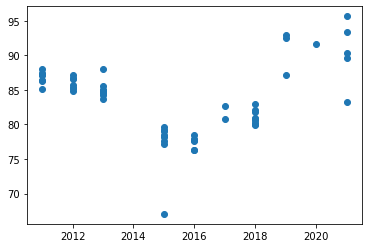

In [49]:
main = df_temp6.loc[((df_temp6['dmaintain']==1))]
main.shape
import matplotlib.pyplot as plt
plt.plot('연도', 'tenderRatio', 'o', data=main)

In [50]:
new.head()

,낙찰율(예대),Collusion,기초금액,dnumfirm2,d2011,d2012,d2013,d2014,d2016,d2017,d2018,d2019,d2020,d33,d66,dmaintain,공고명,연도,tenderRatio,LnCash,db2013,db2014,db2017_a,db2017_b
114,0.88008,0,2120679000,2,0,0,1,0,0,0,0,0,0,0,1,1,발전통합운영시스템 점검정비 용역 [공가][PQ],2013,88.00830,21.47500,1,1,0,0
153,0.77231,0,11263076000,2,0,0,0,1,0,0,0,0,0,0,0,1,수도 및 댐보시설 점검정비용역(제7권역) [정][제한][공가][PQ],2015,77.23106,23.14480,0,1,1,0
171,0.67048,0,2137534902,3,0,0,0,1,0,0,0,0,0,0,1,1,발전통합운영시스템 점검정비 용역 [제한][공가],2015,67.04763,21.48292,0,1,1,0
195,0.76228,0,37480949000,2,0,0,0,0,1,0,0,0,0,0,0,1,수도 및 댐.보시설 점검정비용역(제1권역) [제한][공가][PQ],2016,76.22829,24.34710,0,0,1,1
196,0.76306,0,34433058000,2,0,0,0,0,1,0,0,0,0,0,0,1,수도 및 댐.보시설 점검정비용역(제2권역) [공가][PQ],2016,76.30595,24.26228,0,0,1,1


c:\Users\user\anaconda3\envs\energy\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\anaconda3\envs\energy\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\anaconda3\envs\energy\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45209 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\anaconda3\envs\energy\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\anaconda3\envs\energy\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\anaconda3\envs\energy\lib\site-packages\matplotlib\backe

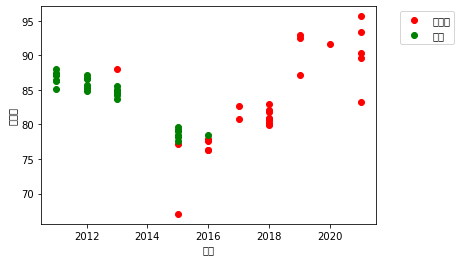

In [51]:
import matplotlib.pyplot as plt

#plt.plot('연도', 'tenderRatio', 'o' ,data=original,)
plt.plot('연도', 'tenderRatio', 'or' ,data=new, label = "비담합")
plt.plot('연도', 'tenderRatio', 'og', data=collusion, label = "담합")
plt.xlabel("연도")
plt.ylabel("낙찰률")
plt.legend(loc = 'upper right', bbox_to_anchor=(1.25, 1))

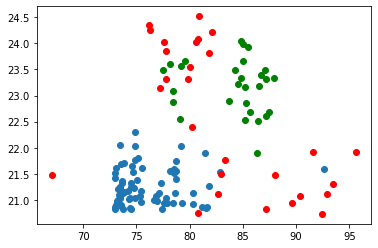

In [52]:
import matplotlib.pyplot as plt

plt.plot('tenderRatio', 'LnCash', 'o' ,data=original,)
plt.plot('tenderRatio', 'LnCash', 'or' ,data=new,)
plt.plot('tenderRatio', 'LnCash', 'og', data=collusion)

In [53]:
df_temp6.loc[df_temp6['tenderRatio'] == 100].shape

(0, 24)

In [169]:
df_temp6.loc[((df_temp6['tenderRatio'] < 65) & (df_temp6['LnCash'] < 26)) | ((df_temp6['tenderRatio'] > 95) & (df_temp6['LnCash'] > 26))]

,낙찰율(예대),Collusion,기초금액,dnumfirm2,d2011,d2012,d2013,d2014,d2015,d2016,d2017,d2018,d2019,d2020,d33,d66,dmaintain,공고명,연도,tenderRatio,LnCash,db2013,db2014,db2017_a,db2017_b


In [170]:
# df_temp6.loc[(df_temp6['공고명'].str.contains("구매")), ['낙찰율(예대)','기초금액','공고명', 'dnumfirm2']].to_csv("./V Final_0920/a01.csv", index=False, encoding='EUC-KR')

In [171]:
df_temp6.loc[~(df_temp6['공고명'].str.contains("구매")) & ((df_temp6['tenderRatio'] < 65) & ((df_temp6['LnCash'] < 26)) | ((df_temp6['tenderRatio'] > 95) & (df_temp6['LnCash'] > 26))), ['Collusion','낙찰율(예대)','기초금액','공고명','dnumfirm2']]

,Collusion,낙찰율(예대),기초금액,공고명,dnumfirm2


In [54]:
df_temp6 = df_temp6.loc[~((df_temp6['tenderRatio'] < 65) & (df_temp6['LnCash'] < 26)) & 
             ~((df_temp6['tenderRatio'] > 95) & (df_temp6['LnCash'] > 26)) &
             ~(df_temp6['공고명'].str.contains("구매"))]

df_temp6.shape

(132, 24)

In [144]:
df_temp4.loc[df_temp4['공고명'].str.contains("실시설계")].shape

(0, 20)

In [45]:
df_raw.loc[df_raw['공고명'].str.contains("실시설계")].isna().sum() # 2개 실시설계 용역 낙찰률 X / 1개 실시설계 용역 송산그린시티 낙찰율 0.59 이상치 / 1개 실시설계 용역 

낙찰율(예대)      2
연도           0
기초금액         0
1순위투찰금액      0
업체수          0
담합           0
점검정비         0
공고명          0
공고번호         0
감정         164
dtype: int64

In [46]:
np.mean(df_temp6['tenderRatio'])

80.18366659617949

In [47]:
np.mean(df_temp6.loc[df_temp6['Collusion'] == 0, 'tenderRatio'])

79.96273285147075

In [250]:
# """ 점검정비만 돌려봐 """
# df_temp6 = df_temp6.loc[(df_temp6['dmaintain']==1)]
# df_temp6.shape # 56개 (기존 58개에서 2개 제외)

(56, 25)

In [49]:
df_temp6.loc[(df_temp6['공고명'].str.contains("설계"))  & ~ (df_temp6['공고명'].str.contains("실시설계")), ['Collusion','dmaintain','tenderRatio','LnCash','공고명']]

,Collusion,dmaintain,tenderRatio,LnCash,공고명
70,0,0,81.94853,22.58717,부산 에코델타시티 도시관리계획 및 1구간 기본설계 용역 [공가][PQ]
106,0,0,91.91518,21.38182,3차원 (댐)설계ㆍ시공 지원 시스템 개발 [공가]
136,0,0,81.44877,21.24319,수도권(2단계) 광역상수도 용수공급 신뢰성제고사업 제2공구 기본설계용역 [공가][PQ]
394,0,0,91.56227,20.91507,다목적댐 매설계기시스템 종합개선 확대구축 용역 [정][제한][공가]
397,0,0,79.32388,21.64164,송산그린시티 국제테마파크 주거단지 기본설계 용역 [공가]


In [54]:
df_temp6.loc[df_temp6['공고명'].str.contains("설계")].append(df_temp6.loc[df_temp6['공고명'].str.contains("매설계")]).shape

(166, 25)

In [59]:
np.mean(df_temp6.loc[df_temp6['dmaintain'] == 0])

낙찰율(예대)                0.79770
Collusion              0.00000
기초금액          2626100138.72867
dnumfirm2              4.28884
d2011                  0.03939
d2012                  0.04814
d2013                  0.08315
d2014                  0.03939
d2015                  0.04158
d2016                  0.06783
d2017                  0.07659
d2018                  0.09847
d2019                  0.15536
d2020                  0.18162
d33                    0.33479
d66                    0.37418
dmaintain              0.00000
연도                  2017.54923
tenderRatio           79.76974
LnCash                21.48095
db2013                 0.17068
db2014                 0.21007
db2017_a               0.22538
db2017_b               0.18600
dtype: float64

In [56]:
np.mean(df_temp6.loc[(df_temp6['공고명'].str.contains("설계") & (~df_temp6['공고명'].str.contains("매설계"))),'tenderRatio'])

79.26968787566483

In [55]:
df_temp6.loc[(df_temp6['공고명'].str.contains("설계") & (~df_temp6['공고명'].str.contains("매설계"))),'tenderRatio'].shape

(164,)

In [254]:
# """ "설계" 총 165개 중 "매설계" 1개 뺀 나머지 164개 제외 : 513 - 164 = 349개 """

# df_temp6 = df_temp6.loc[~(df_temp6['공고명'].str.contains("설계"))].append(df_temp6.loc[df_temp6['공고명'].str.contains("매설계")])
# df_temp6.shape

In [228]:
""" 전체 - 실시설계 총 349개 평균 """
np.mean(df_temp6['tenderRatio'])

83.56161762916763

In [ ]:
""" 156 감정인 데이터 중 실시설계 용역 1개 포함 (관망정비 현장조사) """

outlier = df_156.loc[~(df_156['공고명'].isin(df_temp6.loc[(df_temp6['공고명'].isin(df_156['공고명'])),'공고명']))]
outlier

In [ ]:
df_temp6.loc[df_temp6['공고명'].isin(df_156['공고명'])].append(outlier).shape

(156, 26)

In [ ]:
df_temp6.loc[df_temp6['공고명'].str.contains("실시설계")]

,낙찰율(예대),Collusion,기초금액,dnumfirm2,d2011,d2012,d2013,d2014,d2015,d2016,d2017,d2018,d2019,d2020,d33,d66,dmaintain,공고명,연도,tenderRatio,LnCash,db2013,db2014,db2017_a,db2017_b
14,0.78367,0,2123946000,5.00000,1,0,0,0,0,0,0,0,0,0,0,1,0,시화MTV 중1~117호선(서해안 우회도로) 기본 및 실시설계용역 [정][공가][PQ],2011,78.36658,21.47654,1,1,0,0
17,0.79078,0,1953820000,3.00000,1,0,0,0,0,0,0,0,0,0,0,1,0,광역상수도 공급사업(포천화력발전소 하이닉스) 기본 및 실시설계용역 [공가][PQ],2011,79.07842,21.39305,1,1,0,0
18,0.80175,0,1901130000,3.00000,1,0,0,0,0,0,0,0,0,0,0,1,0,예산당진지역 공업용수도 통합공급시설 기본 및 실시설계용역 [공가][PQ],2011,80.17481,21.36571,1,1,0,0
23,0.79400,0,3205180000,2.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,낙동강 강변여과수사업 도수시설(양산구간) 기본 및 실시설계 용역 [공가][PQ],2011,79.39958,21.88803,1,1,0,0
24,0.79626,0,2207128000,2.00000,1,0,0,0,0,0,0,0,0,0,0,1,0,낙동강 강변여과수사업 도수시설(김해구간) 기본 및 실시설계 용역 [공가][PQ],2011,79.62614,21.51496,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.80689,0,2756160000,2.00000,0,0,0,0,0,0,0,0,0,0,0,1,0,남강댐(Ⅰ) 광역상수도 노후관 개량사업 기본 및 실시설계 용역(2공구) [공가],2021,80.68909,21.73710,0,0,0,0
585,0.83163,0,3670480000,2.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,대청댐 광역상수도 노후관 개량사업 기본 및 실시설계 용역(1공구) [공가],2021,83.16260,22.02359,0,0,0,0
586,0.81816,0,3068230000,2.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,대청댐 광역상수도 노후관 개량사업 기본 및 실시설계 용역(2공구) [공가],2021,81.81562,21.84437,0,0,0,0
589,0.94826,0,1165400000,5.00000,0,0,0,0,0,0,0,0,0,0,1,0,0,포항-안동2(2공구) 국도건설공사 지장관로 이설공사 실시설계 용역 [공가][PQ],2021,94.82592,20.87633,0,0,0,0


In [ ]:
df_temp6.loc[~(df_temp6['공고명'].isin(df_156['공고명'])) & (~df_temp6['dmaintain'] == 1)].shape

(0, 25)

In [ ]:
df_temp6.loc[(~(df_temp6['공고명'].isin(df_156['공고명']))) & (~(df_temp6['dmaintain']==1))].shape # .to_excel('./V Final_1001/139.xlsx', index = False)

(301, 25)

In [ ]:
np.mean(df_temp6.loc[(~(df_temp6['공고명'].isin(df_156['공고명']))) & (~(df_temp6['dmaintain']==1)),'tenderRatio'])

81.12536662478091

In [ ]:
np.mean(df_temp6.loc[~(df_temp6['공고명'].isin(df_156['공고명'])) & (df_temp6['dmaintain'] == 1),'tenderRatio'])

83.56161762916763

In [ ]:
df_temp6.loc[~(df_temp6['공고명'].isin(df_156['공고명']))].shape

(357, 25)

In [ ]:
np.mean(df_temp6.loc[~(df_temp6['공고명'].isin(df_156['공고명'])), 'tenderRatio'])

81.50752364507687

In [140]:
df_temp6.loc[(df_temp6['Collusion'] == 0) & (df_temp6['dmaintain'] == 1)].shape

(28, 25)

In [141]:
np.mean(df_temp6['tenderRatio']), df_temp6.shape # 526개 평균

(83.56161762916763, (56, 25))

In [230]:
df_temp6.loc[df_temp6['dnumfirm2'] != 2]

,낙찰율(예대),Collusion,기초금액,dnumfirm2,d2011,d2012,d2013,d2014,d2015,d2016,d2017,d2018,d2019,d2020,d33,d66,dmaintain,공고명,연도,tenderRatio,LnCash,db2013,db2014,db2017_a,db2017_b
171,0.67048,0,2137534902,3.00000,0,0,0,0,1,0,0,0,0,0,0,1,1,발전통합운영시스템 점검정비 용역 [제한][공가],2015,67.04763,21.48292,0,0,1,1


In [260]:
""" dnumfirm == 2 인 55개 경우만 돌려봐 """
df_temp6 = df_temp6.loc[df_temp6['dnumfirm2'] == 2]

In [259]:
# df_56 = df_temp6
df_56.shape

(56, 25)

In [266]:
df_temp6 = df_56
df_temp6.shape

(56, 25)

In [268]:
df_temp6.loc[df_temp6['dnumfirm2'] != 2].shape

(1, 25)

In [274]:
df_temp6['tenderRatio'].sort_values()

171   67.04763
195   76.22829
196   76.30595
153   77.23106
150   77.54124
205   77.60158
206   77.75113
204   77.82096
148   78.13360
197   78.39932
152   78.40127
149   79.08319
147   79.18655
151   79.59400
304   79.89068
286   80.07567
305   80.20620
287   80.58255
232   80.75895
298   80.78791
289   80.87270
288   81.80710
285   82.11510
233   82.66409
264   82.93440
596   83.29231
82    83.71191
86    84.27634
85    84.54076
81    84.80655
38    84.83441
83    85.00901
80    85.03605
31    85.16000
40    85.24703
44    85.33119
84    85.48650
43    85.65617
29    86.31000
30    86.44000
41    86.56471
42    86.74141
39    87.08431
27    87.13000
33    87.14000
326   87.15198
32    87.50000
28    87.95000
114   88.00830
534   89.63267
535   90.36321
398   91.56431
328   92.44619
327   92.93016
529   93.43547
587   95.64851
Name: tenderRatio, dtype: float64

In [56]:
results1 = smf.ols('tenderRatio ~ Collusion + LnCash + dmaintain + dnumfirm2', data=df_temp6).fit()
# results2 = smf.ols('tenderRatio ~ Collusion + LnCash + dmaintain + dnumfirm2 + d2011 + d2012 + d2013 + d2014 + d2015 + d2016 + d2017 + d2018 + d2019 + d2020', data=df_temp6).fit()
# results3 = smf.ols('tenderRatio ~ Collusion + LnCash + dmaintain + dnumfirm2 + d2011 + d2012 + d2013 + d2014 + d2015 + d2016 + d2017 + d2018 + d2019 + d2020 + d33 + d66', data=df_temp6).fit()
results2 = smf.ols('tenderRatio ~ Collusion + LnCash + dmaintain + dnumfirm2 + d2011 + d2012 + d2013 + d2014 + d2016 + d2017 + d2018 + d2019 + d2020', data=df_temp6).fit()
results3 = smf.ols('tenderRatio ~ Collusion + LnCash + dmaintain + dnumfirm2 + d2011 + d2012 + d2013 + d2014 + d2016 + d2017 + d2018 + d2019 + d2020 + d33 + d66', data=df_temp6).fit()

results4 = smf.ols('tenderRatio ~ Collusion + LnCash + dmaintain + dnumfirm2 + db2014 + db2017_b', data=df_temp6).fit()
results5 = smf.ols('tenderRatio ~ Collusion + LnCash + dmaintain + dnumfirm2 + d33 + d66 + db2014 + db2017_b', data=df_temp6).fit()


stargazer_tab = Stargazer([results1, results2, results3, results4, results5])
open('./V Final_1011/regression_132_dmaintain_2014.html', 'w').write(stargazer_tab.render_html())  # for latex

6123

In [270]:
# results1 = smf.ols('tenderRatio ~ Collusion + LnCash ', data=df_temp6).fit()

# results2 = smf.ols('tenderRatio ~ Collusion + LnCash  + d2013', data=df_temp6).fit()
# results3 = smf.ols('tenderRatio ~ Collusion + LnCash  + d2015', data=df_temp6).fit()
# results4 = smf.ols('tenderRatio ~ Collusion + LnCash  + d2017', data=df_temp6).fit()

# results5 = smf.ols('tenderRatio ~ Collusion + LnCash  + d33 + d66', data=df_temp6).fit()

# results6 = smf.ols('tenderRatio ~ Collusion + LnCash  + d2013 + d33 + d66', data=df_temp6).fit()
# results7 = smf.ols('tenderRatio ~ Collusion + LnCash  + d2015 + d33 + d66', data=df_temp6).fit()
# results8 = smf.ols('tenderRatio ~ Collusion + LnCash  + d2017 + d33 + d66', data=df_temp6).fit()

# stargazer_tab = Stargazer([results1, results2, results3, results4, results5, results6, results7, results8])
# open('./V Final_1006/regression_56_업체수미포함.html', 'w').write(stargazer_tab.render_html())  # for latex

4712

In [57]:
df_xmatrix = df_temp6.loc[(df_temp6['Collusion'] == 1) & (df_temp6['tenderRatio'] < 90)]
#df_xmatrix = df_xmatrix.drop(['Collusion'], axis = 1)
df_xmatrix.shape

(28, 24)

In [58]:
fitted = pd.concat([df_xmatrix['tenderRatio'],  results1.predict(df_xmatrix), results2.predict(df_xmatrix), results3.predict(df_xmatrix), results4.predict(df_xmatrix), 
                    results5.predict(df_xmatrix)], axis = 1)

fitted.columns = ['tenderRatio', 'fitted1', 'fitted2', 'fitted3', 'fitted4', 'fitted5']

fitted_final = fitted.copy()
fitted_final['diff1'] = fitted['tenderRatio'] - fitted['fitted1'] + results1.params['Collusion']
fitted_final['diff2'] = fitted['tenderRatio'] - fitted['fitted2'] + results2.params['Collusion']
fitted_final['diff3'] = fitted['tenderRatio'] - fitted['fitted3'] + results3.params['Collusion']
fitted_final['diff4'] = fitted['tenderRatio'] - fitted['fitted4'] + results4.params['Collusion']
fitted_final['diff5'] = fitted['tenderRatio'] - fitted['fitted5'] + results5.params['Collusion']

fitted_final.to_csv('./V Final_1011/fitted_132_dmaintain_2014.csv', index = False)

In [277]:
# fitted = pd.concat([df_xmatrix['tenderRatio'],  results1.predict(df_xmatrix), results2.predict(df_xmatrix), results3.predict(df_xmatrix), results4.predict(df_xmatrix),
#                     results5.predict(df_xmatrix), results6.predict(df_xmatrix), results7.predict(df_xmatrix), results8.predict(df_xmatrix)], axis = 1)

# fitted.columns = ['tenderRatio', 'fitted1', 'fitted2', 'fitted3', 'fitted4', 'fitted5', 'fitted6', 'fitted7', 'fitted8']

# fitted_final = fitted.copy()
# fitted_final['diff1'] = fitted['tenderRatio'] - fitted['fitted1'] + results1.params['Collusion']
# fitted_final['diff2'] = fitted['tenderRatio'] - fitted['fitted2'] + results2.params['Collusion']
# fitted_final['diff3'] = fitted['tenderRatio'] - fitted['fitted3'] + results3.params['Collusion']
# fitted_final['diff4'] = fitted['tenderRatio'] - fitted['fitted4'] + results4.params['Collusion']
# fitted_final['diff5'] = fitted['tenderRatio'] - fitted['fitted5'] + results5.params['Collusion']
# fitted_final['diff6'] = fitted['tenderRatio'] - fitted['fitted6'] + results6.params['Collusion']
# fitted_final['diff7'] = fitted['tenderRatio'] - fitted['fitted7'] + results7.params['Collusion']
# fitted_final['diff8'] = fitted['tenderRatio'] - fitted['fitted8'] + results8.params['Collusion']

# fitted_final.to_csv('./V Final_1006/fitted_56_업체수미포함.csv', index = False)

### 7. Exclude collusion

In [59]:
df_temp7 = df_temp6.loc[df_temp6['Collusion'] == 0]
np.mean(df_temp7['tenderRatio'])
df_temp7.shape

(104, 24)

In [60]:
df_temp7.shape

(104, 24)

In [61]:
# df_temp = df_temp6.loc[df_temp6['Collusion'] == 0]

results1 = smf.ols('tenderRatio ~ LnCash + dmaintain + dnumfirm2', data=df_temp7).fit()
# results2 = smf.ols('tenderRatio ~ LnCash + dmaintain + dnumfirm2 + d2011 + d2012 + d2013 + d2014 + d2015 + d2016 + d2017 + d2018 + d2019 + d2020', data=df_temp7).fit()
# results3 = smf.ols('tenderRatio ~ LnCash + dmaintain + dnumfirm2 + d2011 + d2012 + d2013 + d2014 + d2015 + d2016 + d2017 + d2018 + d2019 + d2020 + d33 + d66', data=df_temp7).fit()
results2 = smf.ols('tenderRatio ~ LnCash + dmaintain + dnumfirm2 + d2011 + d2012 + d2013 + d2014 + d2016 + d2017 + d2018 + d2019 + d2020', data=df_temp7).fit()
results3 = smf.ols('tenderRatio ~ LnCash + dmaintain + dnumfirm2 + d2011 + d2012 + d2013 + d2014 + d2016 + d2017 + d2018 + d2019 + d2020 + d33 + d66', data=df_temp7).fit()
results4 = smf.ols('tenderRatio ~ LnCash + dmaintain + dnumfirm2 + db2014 + db2017_b', data=df_temp7).fit()
results5 = smf.ols('tenderRatio ~ LnCash + dmaintain + dnumfirm2 + d33 + d66 + db2014 + db2017_b', data=df_temp7).fit()


stargazer_tab = Stargazer([results1, results2, results3, results4, results5])
open('./V Final_1011/regression_104_dmaintain_2014.html', 'w').write(stargazer_tab.render_html())  # for latex

5796

In [280]:
# results1 = smf.ols('tenderRatio ~ LnCash ', data=df_temp7).fit()

# results2 = smf.ols('tenderRatio ~ LnCash  + d2013', data=df_temp7).fit()
# results3 = smf.ols('tenderRatio ~ LnCash  + d2015', data=df_temp7).fit()
# results4 = smf.ols('tenderRatio ~ LnCash  + d2017', data=df_temp7).fit()

# results5 = smf.ols('tenderRatio ~ LnCash  + d33 + d66', data=df_temp7).fit()

# results6 = smf.ols('tenderRatio ~ LnCash  + d2013 + d33 + d66', data=df_temp7).fit()
# results7 = smf.ols('tenderRatio ~ LnCash  + d2015 + d33 + d66', data=df_temp7).fit()
# results8 = smf.ols('tenderRatio ~ LnCash  + d2017 + d33 + d66', data=df_temp7).fit()

# stargazer_tab = Stargazer([results1, results2, results3, results4, results5, results6, results7, results8])
# open('./V Final_1006/regression_28_업체수미포함.html', 'w').write(stargazer_tab.render_html())  # for latex

4277

In [62]:
fitted = pd.concat([df_xmatrix['tenderRatio'],  results1.predict(df_xmatrix), results2.predict(df_xmatrix), results3.predict(df_xmatrix), results4.predict(df_xmatrix),
                    results5.predict(df_xmatrix)], axis = 1)

fitted.columns = ['tenderRatio', 'fitted1', 'fitted2', 'fitted3', 'fitted4', 'fitted5']

fitted_final = fitted.copy()
fitted_final['diff1'] = fitted['tenderRatio'] - fitted['fitted1']
fitted_final['diff2'] = fitted['tenderRatio'] - fitted['fitted2']
fitted_final['diff3'] = fitted['tenderRatio'] - fitted['fitted3'] 
fitted_final['diff4'] = fitted['tenderRatio'] - fitted['fitted4'] 
fitted_final['diff5'] = fitted['tenderRatio'] - fitted['fitted5']


fitted_final.to_csv('./V Final_1011/fitted_104_dmaintain_2014.csv', index = False)

In [193]:
# fitted = pd.concat([df_xmatrix['tenderRatio'],  results1.predict(df_xmatrix), results2.predict(df_xmatrix), results3.predict(df_xmatrix), results4.predict(df_xmatrix),
#                     results5.predict(df_xmatrix), results6.predict(df_xmatrix), results7.predict(df_xmatrix), results8.predict(df_xmatrix)], axis = 1)

# fitted.columns = ['tenderRatio', 'fitted1', 'fitted2', 'fitted3', 'fitted4', 'fitted5', 'fitted6', 'fitted7', 'fitted8']

# fitted_final = fitted.copy()
# fitted_final['diff1'] = fitted['tenderRatio'] - fitted['fitted1']
# fitted_final['diff2'] = fitted['tenderRatio'] - fitted['fitted2']
# fitted_final['diff3'] = fitted['tenderRatio'] - fitted['fitted3'] 
# fitted_final['diff4'] = fitted['tenderRatio'] - fitted['fitted4'] 
# fitted_final['diff5'] = fitted['tenderRatio'] - fitted['fitted5']
# fitted_final['diff6'] = fitted['tenderRatio'] - fitted['fitted6']
# fitted_final['diff7'] = fitted['tenderRatio'] - fitted['fitted7']
# fitted_final['diff8'] = fitted['tenderRatio'] - fitted['fitted8']

# fitted_final.to_csv('./V Final_1006/fitted_28_업체수미포함_check.csv', index = False)

In [498]:
fitted = pd.concat([df_xmatrix['tenderRatio'], results1.predict(df_xmatrix), results2.predict(df_xmatrix), results3.predict(df_xmatrix), 
                    results5.predict(df_xmatrix), results6.predict(df_xmatrix)], axis = 1)

fitted.columns = ['tenderRatio','fitted1', 'fitted2', 'fitted3', 'fitted5', 'fitted6']

fitted_final = fitted.copy()
fitted_final['diff1'] = fitted['tenderRatio'] - fitted['fitted1'] 
fitted_final['diff2'] = fitted['tenderRatio'] - fitted['fitted2']
fitted_final['diff3'] = fitted['tenderRatio'] - fitted['fitted3']
fitted_final['diff5'] = fitted['tenderRatio'] - fitted['fitted5']
fitted_final['diff6'] = fitted['tenderRatio'] - fitted['fitted6']

fitted_final.to_csv('./V Final_1006/fitted_485_14년.csv', index = False)


# New LS 220916 FINAL : 감정인데이터 기준으로 (2) 사용&제외

### 0916 1230 지하수 2개 관측치 제거
### 0916 1335 점검정비 55개? 포함

In [48]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from scipy.stats import f

pd.set_option('Display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [49]:
# dfReg = pd.read_excel("./교수님 전달 파일/0914 datafile excluded version.xlsx", sheet_name=None, header = 4)
dfReg = pd.read_excel("./교수님 전달 파일/0915 datafile excluded version dmaintain.xlsx", sheet_name=None, header = 4)

In [50]:
dfReg.keys()

dict_keys(['2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년'])

In [51]:
raw = pd.concat(dfReg, ignore_index=True)

In [52]:
Klist = pd.Series(['2011-0107' ,'2011-0892','2013-0036' ,'2013-0559' ,'2013-2386' ,'2016-4565' ,'2017-0119' ,'2018-0139' ,'B5201800526' ,'B5201900988' ,'B5201901079' ,'B5201901922' ,'B5202002509'])

In [65]:
df_raw = raw[['공고명','낙찰율(예대)','연도','기초금액','1순위투찰금액','업체수','담합','점검정비','공고번호','감정']]

df_raw.shape

(601, 10)

In [66]:
df_raw.loc[df_raw['낙찰율(예대)'] == 1]

,공고명,낙찰율(예대),연도,기초금액,1순위투찰금액,업체수,담합,점검정비,공고번호,감정
560,대산임해산업지역 공업용수도(해수담수화)사업 건설공사 [제한][공가],1.00000,2021,251287000000,251287000000,3,0,0,B3202100755,NaN


In [67]:
df_raw['공고번호'].isin(Klist)

0      False
1      False
2      False
3      False
4      False
       ...  
596    False
597    False
598    False
599    False
600    False
Name: 공고번호, Length: 601, dtype: bool

In [68]:
df_raw.loc[df_raw['점검정비'] == 1].shape

(58, 10)

In [69]:
# df_raw.loc[df_raw['공고명'].str.contains("지하수 기초조사") | 
#            df_raw['공고명'].str.contains("시설 전수조사") | 
#            df_raw['공고명'].str.contains("관측망") | 
#            df_raw['공고명'].str.contains("정밀안전") | 
#            df_raw['공고명'].str.contains("GIS") |
#            df_raw['공고명'].str.contains("내진") |
#            df_raw['공고명'].str.contains("사후환경") |
#            df_raw['공고명'].str.contains("기술진단") | 
#            df_raw['공고명'].str.contains("시설안정화") |
#            df_raw['공고명'].str.contains("건설사업관리") |
#            df_raw['공고명'].str.contains("댐비상대처") |
#            df_raw['공고명'].str.contains("물 진단고도화") |
#            df_raw['공고명'].str.contains("환경영향평가") |
#            df_raw['공고명'].str.contains("관망정비 현장조사") |
#            df_raw['공고명'].str.contains("관로이설공사") |
#            df_raw['공고명'].str.contains("해양환경영향조사") |
#            df_raw['공고명'].str.contains("송산그린시티") |
#            df_raw['공고명'].str.contains("시공감리")]

In [70]:
df_raw.loc[df_raw['공고번호'].isin(Klist)].shape

(13, 10)

In [71]:
from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)
rcParams['axes.unicode_minus'] = False

In [72]:
# df_raw_out = df_raw.loc[df_raw['공고명'].str.contains("지하수 기초조사") | 
#            df_raw['공고명'].str.contains("시설 전수조사") | 
#            df_raw['공고명'].str.contains("관측망") | 
#            df_raw['공고명'].str.contains("정밀안전") | 
#            df_raw['공고명'].str.contains("GIS") |
#            df_raw['공고명'].str.contains("내진") |
#            df_raw['공고명'].str.contains("사후환경") |
#            df_raw['공고명'].str.contains("기술진단") | 
#            df_raw['공고명'].str.contains("시설안정화") |
#            df_raw['공고명'].str.contains("건설사업관리") |
#            df_raw['공고명'].str.contains("댐비상대처") |
#            df_raw['공고명'].str.contains("물 진단고도화") |
#            df_raw['공고명'].str.contains("환경영향평가") |
#            df_raw['공고명'].str.contains("관망정비 현장조사") |
#            df_raw['공고명'].str.contains("관로이설공사") |
#            df_raw['공고명'].str.contains("해양환경영향조사") |
#            df_raw['공고명'].str.contains("송산그린시티") |
#            df_raw['공고명'].str.contains("시공감리")]

# df_raw_out.to_csv("df_out.csv", index = False)

In [73]:
np.mean(df_raw.loc[(df_raw['공고명'].str.contains("설계")), '낙찰율(예대)'])

0.791873263192979

In [74]:
df_raw.loc[(df_raw['공고명'].str.contains("설계")), '낙찰율(예대)'].dropna()

14    0.78367
17    0.79078
18    0.80175
23    0.79400
24    0.79626
        ...  
584   0.80689
585   0.83163
586   0.81816
589   0.94826
600   0.83543
Name: 낙찰율(예대), Length: 167, dtype: float64

In [75]:
df_raw.loc[((df_raw['공고명'].str.contains("송산그린시티")) & ((df_raw['공고명'].str.contains("설계"))))]

,공고명,낙찰율(예대),연도,기초금액,1순위투찰금액,업체수,담합,점검정비,공고번호,감정
15,시화2단계(송산그린시티) 개발사업 동측지구 조경공사 기본 및 실시설계 용역 [정][...,NaN,2011,1701000000,0,5,0,0,2011-1410,NaN
65,송산그린시티 동측지구 연결도로 기본 및 실시설계 용역 [공가][PQ],0.75587,2012,1588300000,1210740000,6,0,0,2012-2005,NaN
242,송산그린시티 서측지구 1단계 실시설계 용역 [정][공가],0.59446,2017,8321000000,4992600000,2,0,0,2017-1329,NaN
250,송산그린시티 서측지구 연결도로 및 삼양통상사거리 지하차도 기본 및 실시설계 용역 [...,0.77570,2017,3701000000,2888900000,5,0,0,2017-2493,NaN
397,송산그린시티 국제테마파크 주거단지 기본설계 용역 [공가],0.79324,2019,2505217000,1992100000,2,0,0,B5201903528,NaN


In [77]:
"""@@@@@@@@@@@@@@@@@@@@@@@"""

df_raw2 = df_raw.loc[df_raw['공고명'].str.contains("지하수 기초조사") | 
           df_raw['공고명'].str.contains("시설 전수조사") | 
           df_raw['공고명'].str.contains("관측망") | 
           df_raw['공고명'].str.contains("정밀안전") | 
           df_raw['공고명'].str.contains("GIS") |
           df_raw['공고명'].str.contains("내진") |
           df_raw['공고명'].str.contains("사후환경") |
           df_raw['공고명'].str.contains("기술진단") | 
           df_raw['공고명'].str.contains("시설안정화") |
           df_raw['공고명'].str.contains("건설사업관리") |
           df_raw['공고명'].str.contains("비상대처") |
           df_raw['공고명'].str.contains("물 진단고도화") |
           df_raw['공고명'].str.contains("환경영향평가") |
           df_raw['공고명'].str.contains("관망정비 현장조사") |
           df_raw['공고명'].str.contains("관로이설공사") |
           df_raw['공고명'].str.contains("해양환경영향조사") |
           ((df_raw['공고명'].str.contains("송산그린시티")) & (~(df_raw['공고명'].str.contains("설계")))) |
           df_raw['공고명'].str.contains("시공감리") |
           df_raw['점검정비'] == 1 | 
           (~df_raw['감정'].isna())]

df_raw2.shape

(227, 10)

In [80]:
df_raw.loc[~df_raw['감정'].isna()].shape

(76, 10)

In [684]:
df_raw2.isna().sum()

공고명        0
낙찰율(예대)    3
연도         0
기초금액       0
1순위투찰금액    0
업체수        0
담합         0
점검정비       0
공고번호       0
dtype: int64

In [685]:
df_raw.loc[df_raw['공고번호'].isin(Klist)]

,공고명,낙찰율(예대),연도,기초금액,1순위투찰금액,업체수,담합,점검정비,공고번호
6,시화MTV광역교통개선대책 서해안로 확장 및 교차로 입체화공사 책임감리 용역 [공가]...,0.75040,2011,1947383000,1452440000,7,0,0,2011-0107
10,댐 비상대처계획 수립 용역 [공가][PQ],0.81523,2011,1119800000,919600000,2,0,0,2011-0892
76,부산 에코 델타시티 교통재해에너지분야 영향평가 용역 [공가][PQ],0.74876,2013,1380170000,1020500000,6,0,0,2013-0036
88,대전충북지역(4단계) 지하수시설 전수조사 [제한][공가][PQ],0.74407,2013,1364000000,1014530000,5,0,0,2013-0559
117,금강광역상수도 노후관 갱생공사 시공감리 용역 [제한][공가][PQ],0.73028,2014,2197800000,1612000000,3,0,0,2013-2386
203,고덕산업단지 공업용수도 및 한강하류권(2차)급수체계조정사업 시설공사(2공구) 건설사...,0.78553,2016,2219800000,1752450000,3,0,0,2016-4565
224,부여군 블록구축 및 관망정비 현장조사 용역 [공가][PQ],0.73298,2017,1614800000,1199950000,2,0,0,2017-0119
265,다목적댐(10개) 시설안정화 방안 수립 용역 [공가][PQ],0.77383,2018,1115000000,865700000,3,0,0,2018-0139
284,(재공고)댐 비상대처계획 재수립 용역 [제한][공가][PQ],0.77919,2018,1248500000,961500000,2,0,0,B5201800526
346,양구지역 지하수 수량·수질 통합조사 [제한][공가][PQ],0.73002,2019,1144800000,838425000,7,0,0,B5201900988


In [686]:
df_raw2.loc[df_raw2['공고번호'].isin(Klist)]

,공고명,낙찰율(예대),연도,기초금액,1순위투찰금액,업체수,담합,점검정비,공고번호
10,댐 비상대처계획 수립 용역 [공가][PQ],0.81523,2011,1119800000,919600000,2,0,0,2011-0892
88,대전충북지역(4단계) 지하수시설 전수조사 [제한][공가][PQ],0.74407,2013,1364000000,1014530000,5,0,0,2013-0559
117,금강광역상수도 노후관 갱생공사 시공감리 용역 [제한][공가][PQ],0.73028,2014,2197800000,1612000000,3,0,0,2013-2386
203,고덕산업단지 공업용수도 및 한강하류권(2차)급수체계조정사업 시설공사(2공구) 건설사...,0.78553,2016,2219800000,1752450000,3,0,0,2016-4565
224,부여군 블록구축 및 관망정비 현장조사 용역 [공가][PQ],0.73298,2017,1614800000,1199950000,2,0,0,2017-0119
265,다목적댐(10개) 시설안정화 방안 수립 용역 [공가][PQ],0.77383,2018,1115000000,865700000,3,0,0,2018-0139
284,(재공고)댐 비상대처계획 재수립 용역 [제한][공가][PQ],0.77919,2018,1248500000,961500000,2,0,0,B5201800526


In [687]:
df_raw3 = df_raw2.append(df_raw.loc[df_raw['공고번호'].isin(Klist)]).drop_duplicates()

In [688]:
df_raw3.shape

(233, 9)

In [689]:
df_raw3.loc[df_raw3['공고명'].str.contains("관망정비")]

,공고명,낙찰율(예대),연도,기초금액,1순위투찰금액,업체수,담합,점검정비,공고번호
224,부여군 블록구축 및 관망정비 현장조사 용역 [공가][PQ],0.73298,2017,1614800000,1199950000,2,0,0,2017-0119
271,옥천군 지방상수도 현대화사업 블록구축 및 관망정비 현장조사 및 실시설계 용역 [공가...,0.79320,2018,2429900000,1944250000,2,0,0,2018-0365


In [690]:
df_raw3['담합'].sum() ,df_raw3['점검정비'].sum() # 30 & 44 ok

(30, 58)

In [691]:
df_raw3.isna().sum()

공고명        0
낙찰율(예대)    3
연도         0
기초금액       0
1순위투찰금액    0
업체수        0
담합         0
점검정비       0
공고번호       0
dtype: int64

In [692]:
df_raw.loc[(df_raw['점검정비'] == 1) & (df_raw['담합'] == 0) & (df_raw['연도'] != 2018)] 

,공고명,낙찰율(예대),연도,기초금액,1순위투찰금액,업체수,담합,점검정비,공고번호
114,발전통합운영시스템 점검정비 용역 [공가][PQ],0.88008,2013,2120679000,1870000000,2,0,1,2013-2242
153,수도 및 댐보시설 점검정비용역(제7권역) [정][제한][공가][PQ],0.77231,2015,11263076000,8667054000,2,0,1,2015-1021
171,발전통합운영시스템 점검정비 용역 [제한][공가],0.67048,2015,2137534902,1442100000,3,0,1,2015-2590
195,수도 및 댐.보시설 점검정비용역(제1권역) [제한][공가][PQ],0.76228,2016,37480949000,28668709378,2,0,1,2016-3954
196,수도 및 댐.보시설 점검정비용역(제2권역) [공가][PQ],0.76306,2016,34433058000,26320629535,2,0,1,2016-3957
204,수도 및 댐.보시설 점검정비용역(제4권역) [제한][공가][PQ],0.77821,2016,23107194000,17986364000,2,0,1,2016-4776
205,수도 및 댐.보시설 점검정비용역(제5권역) [제한][공가][PQ],0.77602,2016,27371223000,21203534000,2,0,1,2016-4777
206,수도 및 댐.보시설 점검정비용역(제6권역) [제한][PQ],0.77751,2016,13463494000,10481812000,2,0,1,2016-4779
232,2017~2018년 수도 ICT 점검정비 용역(한강권역) [공가],0.80759,2017,1026265000,836000000,2,0,1,2017-0856
233,2017~2018년 수도 ICT 점검정비 용역(금·영·섬권역) [공가],0.82664,2017,1476076000,1224500000,2,0,1,2017-0857


In [693]:
df_raw3.shape

(233, 9)

In [694]:
""" 점검정비 6개 포함시킨거 (X)"""
# df_addtoraw = df_raw.loc[(df_raw['점검정비'] == 1) & (df_raw['담합'] == 0) & (df_raw['연도'] != 2018)] 
# df_raw4 = df_raw3.append(df_addtoraw)
# df_raw4.loc[~df_raw4['공고명'].isin(df_raw3['공고명'])]
# df_raw4.drop_duplicates().shape

' 점검정비 6개 포함시킨거 (X)'

In [695]:
df_raw3['점검정비'].sum()

58

### 0. 유찰된 데이터 제거 및 확인 & 0919 이상치 제거

In [696]:
df_temp1 = df_raw3.loc[(df_raw3['1순위투찰금액'] != 0) & (df_raw3['낙찰율(예대)'].isna() != True), ['낙찰율(예대)','연도', '기초금액', '업체수', '담합', '점검정비','공고번호','공고명']]
df_temp1.head(3)
df_temp1.shape

(230, 8)

In [697]:
(df_temp1['담합'] == df_temp1['점검정비']).sum()

202

In [698]:
df_temp1.loc[((df_temp1['담합'] == 1) & (df_temp1['낙찰율(예대)'] > 0.9))]

,낙찰율(예대),연도,기초금액,업체수,담합,점검정비,공고번호,공고명
56,0.90325,2012,4123000000,2,1,1,2012-1404,(재공고)지하수 관측망 점검정비 용역(12~13) [공가][PQ]
131,0.90351,2014,4181900000,2,1,1,2014-1479,지하수 관측망 점검정비(14~15)용역 [PQ]


In [699]:
""" 담합 데이터 2개 제거 """

df_temp1 = df_temp1.loc[~((df_temp1['담합'] == 1) & (df_temp1['낙찰율(예대)'] > 0.9))]
df_temp1.shape


(228, 8)

In [700]:
df_temp1.loc[df_temp1['기초금액'] < 1000000000] # 10억보다 작은 금액 존재 X

,낙찰율(예대),연도,기초금액,업체수,담합,점검정비,공고번호,공고명


In [701]:
df_temp1['연도'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

### 1. 연도별 더미 생성

In [702]:
df_temp2 = df_temp1.copy()
df_temp2[['d2011','d2012','d2013','d2014','d2015','d2016','d2017','d2018','d2019','d2020']] = 0
df_temp2.loc[df_temp2['연도'] == 2011, 'd2011'] = 1 
df_temp2.loc[df_temp2['연도'] == 2012, 'd2012'] = 1 
df_temp2.loc[df_temp2['연도'] == 2013, 'd2013'] = 1 
df_temp2.loc[df_temp2['연도'] == 2014, 'd2014'] = 1 
df_temp2.loc[df_temp2['연도'] == 2015, 'd2015'] = 1 
df_temp2.loc[df_temp2['연도'] == 2016, 'd2016'] = 1 
df_temp2.loc[df_temp2['연도'] == 2017, 'd2017'] = 1 
df_temp2.loc[df_temp2['연도'] == 2018, 'd2018'] = 1 
df_temp2.loc[df_temp2['연도'] == 2019, 'd2019'] = 1 
df_temp2.loc[df_temp2['연도'] == 2020, 'd2020'] = 1 

In [703]:
df_temp2.head(3)

,낙찰율(예대),연도,기초금액,업체수,담합,점검정비,공고번호,공고명,d2011,d2012,d2013,d2014,d2015,d2016,d2017,d2018,d2019,d2020
2,0.77106,2011,1514040000,3,0,0,2010-1774,"서울시 양재대로 수도권 2,3단계 관로이설공사 책임감리용역",1,0,0,0,0,0,0,0,0,0
8,0.76853,2011,1429000000,2,0,0,2011-0647,충남충북지역(2단계) 지하수시설 전수조사,1,0,0,0,0,0,0,0,0,0
9,0.74321,2011,1346000000,2,0,0,2011-0648,전남전북지역(2단계) 지하수시설 전수조사,1,0,0,0,0,0,0,0,0,0


### 2. 규모 더미 생성 (33% & 66% Quantile)

In [704]:
df_temp2['기초금액'].sort_values().quantile([.33, .66])

0.33000   1432276000.00000
0.66000   2901996240.00000
Name: 기초금액, dtype: float64

In [705]:
df_temp3 = df_temp2.copy()
df_temp3['d33'] = 0
df_temp3['d66'] = 0

df_temp3.loc[df_temp3['기초금액'] < df_temp2['기초금액'].sort_values().quantile(.33), 'd33'] = 1
df_temp3.loc[(df_temp3['기초금액'] > df_temp2['기초금액'].sort_values().quantile(.33)) & (df_temp3['기초금액'] < df_temp2['기초금액'].sort_values().quantile(.66)), 'd66'] = 1
df_temp3

,낙찰율(예대),연도,기초금액,업체수,담합,점검정비,공고번호,공고명,d2011,d2012,d2013,d2014,d2015,d2016,d2017,d2018,d2019,d2020,d33,d66
2,0.77106,2011,1514040000,3,0,0,2010-1774,"서울시 양재대로 수도권 2,3단계 관로이설공사 책임감리용역",1,0,0,0,0,0,0,0,0,0,0,1
8,0.76853,2011,1429000000,2,0,0,2011-0647,충남충북지역(2단계) 지하수시설 전수조사,1,0,0,0,0,0,0,0,0,0,1,0
9,0.74321,2011,1346000000,2,0,0,2011-0648,전남전북지역(2단계) 지하수시설 전수조사,1,0,0,0,0,0,0,0,0,0,1,0
10,0.81523,2011,1119800000,2,0,0,2011-0892,댐 비상대처계획 수립 용역 [공가][PQ],1,0,0,0,0,0,0,0,0,0,1,0
13,0.81166,2011,1140700000,2,0,0,2011-1191,여천공업용수도 제3회 정밀안전진단용역,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.74876,2013,1380170000,6,0,0,2013-0036,부산 에코 델타시티 교통재해에너지분야 영향평가 용역 [공가][PQ],0,0,1,0,0,0,0,0,0,0,1,0
346,0.73002,2019,1144800000,7,0,0,B5201900988,양구지역 지하수 수량·수질 통합조사 [제한][공가][PQ],0,0,0,0,0,0,0,0,1,0,1,0
351,0.75408,2019,1564000000,2,0,0,B5201901079,물 인프라 진단고도화 용역 [제한][공가][PQ],0,0,0,0,0,0,0,0,1,0,0,1
359,0.73644,2019,1900000000,3,0,0,B5201901922,조력발전소 운영에 따른 해양물리변화 장기조사용역(2단계) [제한][공가],0,0,0,0,0,0,0,0,1,0,0,1


### 3. 업체수 규제 (완전 제거 & 20으로 고정)

In [706]:
df_temp4 = df_temp3.copy()

In [707]:
# 3-2. dnumfirm2 : 업체수 20 이상은 NAN 으로 값 줘서 추후 삭제
df_temp4['dnumfirm2'] = np.nan
df_temp4.loc[df_temp4['업체수'] <= 20, 'dnumfirm2'] = df_temp4.loc[df_temp4['업체수'] <= 20, '업체수']
df_temp4 = df_temp4.dropna()
df_temp4.shape

(213, 21)

### 4. Linear Regression 준비 위한 dataframe 재정비

In [708]:
df_temp5 = df_temp4[['낙찰율(예대)','담합', '기초금액','dnumfirm2','d2011','d2012','d2013','d2014','d2015','d2016','d2017','d2018','d2019','d2020','d33', 'd66', '점검정비','공고번호','공고명']]
df_temp5 = df_temp5.copy()
df_temp5['낙찰율'] = df_temp5['낙찰율(예대)']*100
df_temp5['ln기초금액'] = np.log(df_temp5['기초금액'])
df_temp5 = df_temp5.rename(columns = {"낙찰율" : "tenderRatio", "담합" : "Collusion", "ln기초금액" : "LnCash", "점검정비" : "dmaintain"})
df_temp5.head()

,낙찰율(예대),Collusion,기초금액,dnumfirm2,d2011,d2012,d2013,d2014,d2015,d2016,d2017,d2018,d2019,d2020,d33,d66,dmaintain,공고번호,공고명,tenderRatio,LnCash
2,0.77106,0,1514040000,3.00000,1,0,0,0,0,0,0,0,0,0,0,1,0,2010-1774,"서울시 양재대로 수도권 2,3단계 관로이설공사 책임감리용역",77.10555,21.13805
8,0.76853,0,1429000000,2.00000,1,0,0,0,0,0,0,0,0,0,1,0,0,2011-0647,충남충북지역(2단계) 지하수시설 전수조사,76.85339,21.08024
9,0.74321,0,1346000000,2.00000,1,0,0,0,0,0,0,0,0,0,1,0,0,2011-0648,전남전북지역(2단계) 지하수시설 전수조사,74.32124,21.02040
10,0.81523,0,1119800000,2.00000,1,0,0,0,0,0,0,0,0,0,1,0,0,2011-0892,댐 비상대처계획 수립 용역 [공가][PQ],81.52287,20.83642
13,0.81166,0,1140700000,2.00000,1,0,0,0,0,0,0,0,0,0,1,0,0,2011-1191,여천공업용수도 제3회 정밀안전진단용역,81.16553,20.85491


In [709]:
df_temp5['dnumfirm2'].isna().sum() #60
df_temp5.shape # 640

(213, 21)

In [710]:
df_temp5.isna().sum().sum()

0

In [711]:
df_temp5['Collusion'].sum()

28

### 4-1. 연도별 더미 추가 생성

In [712]:
df_temp5.head(3)

,낙찰율(예대),Collusion,기초금액,dnumfirm2,d2011,d2012,d2013,d2014,d2015,d2016,d2017,d2018,d2019,d2020,d33,d66,dmaintain,공고번호,공고명,tenderRatio,LnCash
2,0.77106,0,1514040000,3.00000,1,0,0,0,0,0,0,0,0,0,0,1,0,2010-1774,"서울시 양재대로 수도권 2,3단계 관로이설공사 책임감리용역",77.10555,21.13805
8,0.76853,0,1429000000,2.00000,1,0,0,0,0,0,0,0,0,0,1,0,0,2011-0647,충남충북지역(2단계) 지하수시설 전수조사,76.85339,21.08024
9,0.74321,0,1346000000,2.00000,1,0,0,0,0,0,0,0,0,0,1,0,0,2011-0648,전남전북지역(2단계) 지하수시설 전수조사,74.32124,21.02040


In [713]:
df_temp6 = df_temp5.copy() 

df_temp6[['db2013','db2014','db2017_a', 'db2017_b']] = 0

df_temp6.loc[df_temp6['d2011'] == 1, 'db2013'] =1
df_temp6.loc[df_temp6['d2012'] == 1, 'db2013'] =1
df_temp6.loc[df_temp6['d2013'] == 1, 'db2013'] =1

df_temp6.loc[df_temp6['d2011'] == 1, 'db2014'] =1
df_temp6.loc[df_temp6['d2012'] == 1, 'db2014'] =1
df_temp6.loc[df_temp6['d2013'] == 1, 'db2014'] =1
df_temp6.loc[df_temp6['d2014'] == 1, 'db2014'] =1

df_temp6.loc[df_temp6['d2014'] == 1, 'db2017_a'] =1
df_temp6.loc[df_temp6['d2015'] == 1, 'db2017_a'] =1
df_temp6.loc[df_temp6['d2016'] == 1, 'db2017_a'] =1
df_temp6.loc[df_temp6['d2017'] == 1, 'db2017_a'] =1

df_temp6.loc[df_temp6['d2015'] == 1, 'db2017_b'] =1
df_temp6.loc[df_temp6['d2016'] == 1, 'db2017_b'] =1
df_temp6.loc[df_temp6['d2017'] == 1, 'db2017_b'] =1

In [714]:
df_temp6.isna().sum().sum()

0

### 5. 연도 이전 이후 더미 Regression (528개의 경우 : 담합 제외 X)

In [715]:
np.mean(df_temp6['tenderRatio'])

78.92949931422994

In [716]:
original = df_temp6.loc[((df_temp6['Collusion']==0) & (df_temp6['dmaintain']==0))]
new = df_temp6.loc[((df_temp6['Collusion']==0) & (df_temp6['dmaintain']==1))]
collusion = df_temp6.loc[df_temp6['Collusion'] == 1]

In [717]:
original.shape, new.shape, collusion.shape

((157, 25), (28, 25), (28, 25))

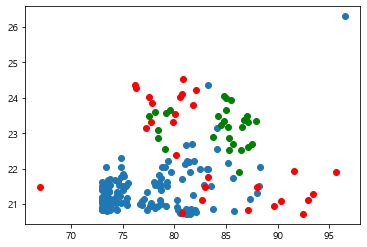

In [718]:
import matplotlib.pyplot as plt

plt.plot('tenderRatio', 'LnCash', 'o' ,data=original,)
plt.plot('tenderRatio', 'LnCash', 'or' ,data=new,)
plt.plot('tenderRatio', 'LnCash', 'og', data=collusion)


In [719]:

""" 이상치 데이터 2개 제거 """


df_temp6 = df_temp6.loc[~(((df_temp6['LnCash'] > 26) & (df_temp6['tenderRatio'] > 95)) | ((df_temp6['LnCash'] < 23) & (df_temp6['tenderRatio'] < 65)))]
df_temp6.shape

(212, 25)

In [720]:
df_156 = df_temp6.loc[df_temp6['Collusion']==0]
df_156.shape

(184, 25)

In [721]:
np.mean(df_156['tenderRatio'])

78.06081564621877

In [722]:
df_temp6.loc[(df_temp6['Collusion'] == 0) & (df_temp6['dmaintain'] == 1)].shape

(28, 25)

In [723]:
results1 = smf.ols('tenderRatio ~ Collusion + LnCash + dnumfirm2', data=df_temp6).fit()
results2 = smf.ols('tenderRatio ~ Collusion + LnCash + dnumfirm2 + d2011 + d2012 + d2013 + d2014 + d2015 + d2016 + d2017 + d2018 + d2019 + d2020', data=df_temp6).fit()
results3 = smf.ols('tenderRatio ~ Collusion + LnCash + dnumfirm2 + d2011 + d2012 + d2013 + d2014 + d2015 + d2016 + d2017 + d2018 + d2019 + d2020 + d33 + d66', data=df_temp6).fit()

results5 = smf.ols('tenderRatio ~ Collusion + LnCash + dnumfirm2 + db2014 + db2017_b', data=df_temp6).fit()
results6 = smf.ols('tenderRatio ~ Collusion + LnCash + dnumfirm2 + d33 + d66 + db2014 + db2017_b', data=df_temp6).fit()


stargazer_tab = Stargazer([results1, results2, results3, results5, results6])
open('./V Final_1006/regression_212_점검_14년.html', 'w').write(stargazer_tab.render_html())  # for latex

6025

In [724]:
"""FFFFFFFFFFFFFFIIIIIIIIIIIIIIIIIITTTTTTTTTTTTT"""

df_xmatrix = df_temp6.loc[(df_temp6['Collusion'] == 1) & (df_temp6['tenderRatio'] < 90)]
df_xmatrix.shape

(28, 25)

In [725]:
fitted = pd.concat([df_xmatrix['tenderRatio'],  results1.predict(df_xmatrix), results2.predict(df_xmatrix), results3.predict(df_xmatrix), 
                    results5.predict(df_xmatrix), results6.predict(df_xmatrix)], axis = 1)

fitted.columns = ['tenderRatio', 'fitted1', 'fitted2', 'fitted3', 'fitted5', 'fitted6']

fitted_final = fitted.copy()
fitted_final['diff1'] = fitted['tenderRatio'] - fitted['fitted1'] + results1.params['Collusion']
fitted_final['diff2'] = fitted['tenderRatio'] - fitted['fitted2'] + results2.params['Collusion']
fitted_final['diff3'] = fitted['tenderRatio'] - fitted['fitted3'] + results3.params['Collusion']
fitted_final['diff5'] = fitted['tenderRatio'] - fitted['fitted5'] + results5.params['Collusion']
fitted_final['diff6'] = fitted['tenderRatio'] - fitted['fitted6'] + results6.params['Collusion']


fitted_final.to_csv('./V Final_1006/fitted_212_점검_14년.csv', index = False)

In [726]:
df_temp7 = df_temp6.loc[df_temp6['Collusion'] == 0]
df_temp7.shape

(184, 25)

In [727]:
df_temp6['dmaintain'].sum()

56

### 7. Exclude collusion

In [728]:
df_temp7 = df_temp6.loc[df_temp6['Collusion'] == 0]

results1 = smf.ols('tenderRatio ~ LnCash + dnumfirm2', data=df_temp7).fit()
results2 = smf.ols('tenderRatio ~ LnCash + dnumfirm2 + d2011 + d2012 + d2013 + d2014 + d2015 + d2016 + d2017 + d2018 + d2019 + d2020', data=df_temp7).fit()
results3 = smf.ols('tenderRatio ~ LnCash + dnumfirm2 + d2011 + d2012 + d2013 + d2014 + d2015 + d2016 + d2017 + d2018 + d2019 + d2020 + d33 + d66', data=df_temp7).fit()
results5 = smf.ols('tenderRatio ~ LnCash + dnumfirm2 + db2014 + db2017_b', data=df_temp7).fit()
results6 = smf.ols('tenderRatio ~ LnCash + dnumfirm2 + d33 + d66 + db2014 + db2017_b', data=df_temp7).fit()



stargazer_tab = Stargazer([results1, results2, results3, results5, results6])
open('./V Final_1006/regression_184_점검_14년.html', 'w').write(stargazer_tab.render_html())  # for latex

5706

In [729]:
df_temp6['dmaintain'].sum()

56

In [730]:
fitted = pd.concat([df_xmatrix['tenderRatio'], results1.predict(df_xmatrix), results2.predict(df_xmatrix), results3.predict(df_xmatrix), 
                    results5.predict(df_xmatrix), results6.predict(df_xmatrix)], axis = 1)

fitted.columns = ['tenderRatio','fitted1', 'fitted2', 'fitted3', 'fitted5', 'fitted6']

fitted_final = fitted.copy()
fitted_final['diff1'] = fitted['tenderRatio'] - fitted['fitted1'] 
fitted_final['diff2'] = fitted['tenderRatio'] - fitted['fitted2']
fitted_final['diff3'] = fitted['tenderRatio'] - fitted['fitted3']
fitted_final['diff5'] = fitted['tenderRatio'] - fitted['fitted5']
fitted_final['diff6'] = fitted['tenderRatio'] - fitted['fitted6']


fitted_final.to_csv('./V Final_1006/fitted_184_점검_14년.csv', index = False)

In [ ]:
df_temp6.columns

Index(['낙찰율(예대)', 'Collusion', '기초금액', 'dnumfirm2', 'd2011', 'd2012', 'd2013',
       'd2014', 'd2015', 'd2016', 'd2017', 'd2018', 'd2019', 'd2020', 'd33',
       'd66', 'dmaintain', '공고번호', '공고명', 'tenderRatio', 'LnCash', 'db2013',
       'db2014', 'db2017_a', 'db2017_b'],
      dtype='object')

### ★ 공고명 각각 이름 몇 개 존재하는지 확인

df_raw87 = df_temp6.loc[df_raw['공고명'].str.contains("지하수 기초조사") | 
           df_temp6['공고명'].str.contains("시설 전수조사") | 
           df_temp6['공고명'].str.contains("관측망") | 
           df_temp6['공고명'].str.contains("정밀안전") | 
           df_temp6['공고명'].str.contains("GIS") |
           df_temp6['공고명'].str.contains("내진") |
           df_temp6['공고명'].str.contains("사후환경") |
           df_temp6['공고명'].str.contains("기술진단") | 
           df_temp6['공고명'].str.contains("시설안정화") |
           df_temp6['공고명'].str.contains("건설사업관리") |
           df_temp6['공고명'].str.contains("댐비상대처") |
           df_temp6['공고명'].str.contains("물 진단고도화") |
           df_temp6['공고명'].str.contains("환경영향평가") |
           df_temp6['공고명'].str.contains("관망정비 현장조사") |
           df_temp6['공고명'].str.contains("관로이설공사") |
           df_temp6['공고명'].str.contains("해양환경영향조사") |
           ((df_temp6['공고명'].str.contains("송산그린시티")) & (~(df_temp6['공고명'].str.contains("설계")))) |
           df_temp6['공고명'].str.contains("시공감리") |
           df_temp6['점검정비'] == 1]

df_raw2.to_csv("df_raw2.csv", index = False, encoding='EUC-KR')

In [ ]:
df_raw.loc[df_raw['공고명'].str.contains("송산그린시티")].shape

(29, 9)

In [ ]:
df_temp6.loc[df_temp6['공고명'].str.contains("송산그린시티")].shape

(13, 25)

In [ ]:
df_temp6.to_excel("df_temp6.xlsx", index=False, encoding='EUC-KR')

In [ ]:
# df_raw.loc[df_raw['공고명'].str.contains("지하수 기초조사")| (df_raw['공고명'].str.contains("시설 전수조사")) | (df_raw['공고명'].str.contains("관측망"))].to_csv("키워드1.csv", index=False, encoding='EUC-KR')
# df_raw.loc[df_raw['공고명'].str.contains("기술진단")].to_csv("키워드2.csv", index=False, encoding='EUC-KR')
# df_raw.loc[df_raw['공고명'].str.contains("관측망")].to_csv("키워드3.csv", index=False, encoding='EUC-KR')
# df_raw.loc[df_raw['공고명'].str.contains("정밀안전")].to_csv("키워드4.csv", index=False, encoding='EUC-KR')
# df_raw.loc[df_raw['공고명'].str.contains("GIS")].to_csv("키워드5.csv", index=False, encoding='EUC-KR')
# df_raw.loc[df_raw['공고명'].str.contains("내진")].to_csv("키워드5.csv", index=False, encoding='EUC-KR')
# df_raw.loc[df_raw['공고명'].str.contains("기술진단")].to_csv("키워드7.csv", index=False, encoding='EUC-KR')



In [ ]:
df_temp6.shape

(212, 25)

In [ ]:
asd = df_temp6.rename({'공고번호' : '입찰공고번호'})
asd

,낙찰율(예대),Collusion,기초금액,dnumfirm2,d2011,d2012,d2013,d2014,d2015,d2016,d2017,d2018,d2019,d2020,d33,d66,dmaintain,공고번호,공고명,tenderRatio,LnCash,db2013,db2014,db2017_a,db2017_b
2,0.77106,0,1514040000,3.00000,1,0,0,0,0,0,0,0,0,0,0,1,0,2010-1774,"서울시 양재대로 수도권 2,3단계 관로이설공사 책임감리용역",77.10555,21.13805,1,1,0,0
8,0.76853,0,1429000000,2.00000,1,0,0,0,0,0,0,0,0,0,1,0,0,2011-0647,충남충북지역(2단계) 지하수시설 전수조사,76.85339,21.08024,1,1,0,0
9,0.74321,0,1346000000,2.00000,1,0,0,0,0,0,0,0,0,0,1,0,0,2011-0648,전남전북지역(2단계) 지하수시설 전수조사,74.32124,21.02040,1,1,0,0
13,0.81166,0,1140700000,2.00000,1,0,0,0,0,0,0,0,0,0,1,0,0,2011-1191,여천공업용수도 제3회 정밀안전진단용역,81.16553,20.85491,1,1,0,0
27,0.87130,1,13465052000,2.00000,1,0,0,0,0,0,0,0,0,0,0,0,1,2011-0000,XXX,87.13000,23.32336,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0.77919,0,1248500000,2.00000,0,0,0,0,0,0,0,1,0,0,1,0,0,B5201800526,(재공고)댐 비상대처계획 재수립 용역 [제한][공가][PQ],77.91850,20.94521,0,0,0,0
346,0.73002,0,1144800000,7.00000,0,0,0,0,0,0,0,0,1,0,1,0,0,B5201900988,양구지역 지하수 수량·수질 통합조사 [제한][공가][PQ],73.00227,20.85850,0,0,0,0
351,0.75408,0,1564000000,2.00000,0,0,0,0,0,0,0,0,1,0,0,1,0,B5201901079,물 인프라 진단고도화 용역 [제한][공가][PQ],75.40839,21.17051,0,0,0,0
359,0.73644,0,1900000000,3.00000,0,0,0,0,0,0,0,0,1,0,0,1,0,B5201901922,조력발전소 운영에 따른 해양물리변화 장기조사용역(2단계) [제한][공가],73.64387,21.36512,0,0,0,0


In [ ]:
dfReg = pd.read_excel("./교수님 전달 파일/회귀분석원자료.xlsx")

# temp1 : 연도별 더미 생성
df_temp1 = dfReg[['tenderRatio','techScore','techGap','낙찰여부','largeBusiness','입찰공고번호','계약명']]
df_temp1.head()


,tenderRatio,techScore,techGap,낙찰여부,largeBusiness,입찰공고번호,계약명
0,77.10555,65.87700,0.00000,NaN,1,2010-1774,서울시 양재대로 수도권23단계 관로이설공사 책임감리용역
1,79.01877,65.14200,0.73500,낙찰,0,2010-1774,서울시 양재대로 수도권23단계 관로이설공사 책임감리용역
2,94.21973,63.68600,2.19100,NaN,1,2010-1774,서울시 양재대로 수도권23단계 관로이설공사 책임감리용역
3,75.03988,69.17100,0.00000,낙찰,0,2011-0107,시화MTV광역교통개선대책 서해안로 확장 및 교차로 입체화공사 책임감리 용역
4,75.19798,67.80600,1.36500,NaN,1,2011-0107,시화MTV광역교통개선대책 서해안로 확장 및 교차로 입체화공사 책임감리 용역


In [ ]:
df_temp1 = df_temp1.loc[df_temp1['낙찰여부'] == '낙찰', ['tenderRatio', '입찰공고번호','계약명']]

In [ ]:
df_temp6.loc[df_temp6['공고명'].str.contains('건설사업관리')].shape

(45, 25)

In [ ]:
df_temp1.loc[df_temp1['계약명'].str.contains("시공감리")]

,tenderRatio,입찰공고번호,계약명
31,75.54585,2012-0977,시화2단계(송산그린시티) 동서진입도로 건설공사 시공감리 용역
37,75.14430,2012-0978,시화2단계(송산그린시티) 국도77호선 건설공사 시공감리 용역
49,76.11295,2012-1551,포천복합화력 용수공급사업 송수시설공사 시공감리용역
52,75.46143,2012-1970,위례신도시 광역상수도56단계 관로이설공사 시공감리용역
108,77.01445,2013-2386,금강광역상수도 노후관 갱생공사 시공감리 용역


In [ ]:
df_temp1.loc[((df_temp1['계약명'].str.contains("송산그린시티")) & (~(df_temp1['계약명'].str.contains("설계"))))]

,tenderRatio,입찰공고번호,계약명
31,75.54585,2012-0977,시화2단계(송산그린시티) 동서진입도로 건설공사 시공감리 용역
37,75.14430,2012-0978,시화2단계(송산그린시티) 국도77호선 건설공사 시공감리 용역
65,78.66110,2013-0185,송산그린시티 개발계획 및 지구단위계획 변경용역
130,73.45081,2016-3304,송산그린시티 동측지구 도로 및 지하매설물 GIS DB 구축용역
160,73.01883,2016-4883,송산그린시티 반입토사 건설사업관리용역


In [ ]:
df_temp1.loc[(df_temp1['계약명'].str.contains("송산그린시티"))]

,tenderRatio,입찰공고번호,계약명
31,75.54585,2012-0977,시화2단계(송산그린시티) 동서진입도로 건설공사 시공감리 용역
37,75.14430,2012-0978,시화2단계(송산그린시티) 국도77호선 건설공사 시공감리 용역
65,78.66110,2013-0185,송산그린시티 개발계획 및 지구단위계획 변경용역
130,73.45081,2016-3304,송산그린시티 동측지구 도로 및 지하매설물 GIS DB 구축용역
160,73.01883,2016-4883,송산그린시티 반입토사 건설사업관리용역


In [ ]:
# df_temp1.to_csv("df_temp1.csv", index = False, encoding='EUC-KR')

In [ ]:
df_temp6.columns

Index(['낙찰율(예대)', 'Collusion', '기초금액', 'dnumfirm2', 'd2011', 'd2012', 'd2013',
       'd2014', 'd2015', 'd2016', 'd2017', 'd2018', 'd2019', 'd2020', 'd33',
       'd66', 'dmaintain', '공고번호', '공고명', 'tenderRatio', 'LnCash', 'db2013',
       'db2014', 'db2017_a', 'db2017_b'],
      dtype='object')

In [ ]:
df_tempplot  = df_temp6.copy()
df_tempplot['감정인사용'] = 0
df_tempplot.loc[(df_temp6['dmaintain'] == 0 ) & (df_temp6['Collusion'] == 0) & (df_tempplot['공고번호'].isin(df_temp1['입찰공고번호'])), '감정인사용'] = 1
df_tempplot.loc[(df_temp6['dmaintain'] == 0 ) & (df_temp6['Collusion'] == 0) & (~df_tempplot['공고번호'].isin(df_temp1['입찰공고번호'])), '감정인사용'] = 2
df_tempplot.loc[df_tempplot['감정인사용'] == 2].shape

(80, 26)

In [ ]:
df_tempplot.loc[(df_tempplot['감정인사용'] == 0) & (df_tempplot['Collusion'] == 1)]

(28, 26)

In [ ]:
in76 = df_tempplot.loc[((df_tempplot['Collusion']==0) & (df_tempplot['dmaintain']==0) & (df_tempplot['감정인사용']==1))]
in80 = df_tempplot.loc[((df_tempplot['Collusion']==0) & (df_tempplot['dmaintain']==0) & (df_tempplot['감정인사용']==2))]
main = df_tempplot.loc[(df_tempplot['Collusion']==0) & (df_tempplot['dmaintain']==1)]
coll = df_tempplot.loc[df_tempplot['Collusion'] == 1]

in76.shape, in80.shape, main.shape, coll.shape

((76, 26), (80, 26), (28, 26), (28, 26))

In [ ]:
np.mean(in80['tenderRatio'])

78.36902247424841

In [ ]:
np.mean(in76['tenderRatio'])

75.87517400799688

In [ ]:
df_tempplot.loc[~((df_tempplot['Collusion']==0) & (df_tempplot['dmaintain']==0)), 'tenderRatio'].shape

(56,)

In [ ]:
np.mean(df_tempplot['tenderRatio'])

78.84663023481616

In [ ]:
np.mean(df_tempplot.loc[((df_tempplot['Collusion']==0) & (df_tempplot['dmaintain']==0)) | ((df_tempplot['Collusion']==0) & (df_tempplot['dmaintain']==1)), 'tenderRatio'])

78.06081564621877

In [ ]:
np.mean(df_tempplot.loc[((df_tempplot['Collusion']==0) & (df_tempplot['dmaintain']==0)) | ((df_tempplot['Collusion']==1) & (df_tempplot['dmaintain']==1)), 'tenderRatio'])

78.19744865991527

In [ ]:
df_tempplot.loc[((df_tempplot['Collusion']==0) & (df_tempplot['dmaintain']==0)) | ((df_tempplot['Collusion']==1) & (df_tempplot['dmaintain']==1)), 'tenderRatio'].shape

(184,)

In [ ]:
df_tempplot.loc[(df_tempplot['Collusion'] == 0) & (df_tempplot['dmaintain']==1)].shape

(28, 26)

In [ ]:
np.mean(df_tempplot.loc[((df_tempplot['Collusion']==0) & (df_tempplot['dmaintain']==0)), 'tenderRatio'])

77.15407065735664

In [ ]:
""" tech score 의 경우 156개 중 67개 만 존재하고 나머지 존재하지 X 도출 불가 """
df_tempplot.columns

Index(['낙찰율(예대)', 'Collusion', '기초금액', 'dnumfirm2', 'd2011', 'd2012', 'd2013',
       'd2014', 'd2015', 'd2016', 'd2017', 'd2018', 'd2019', 'd2020', 'd33',
       'd66', 'dmaintain', '공고번호', '공고명', 'tenderRatio', 'LnCash', 'db2013',
       'db2014', 'db2017_a', 'db2017_b', '감정인사용'],
      dtype='object')

Text(0, 0.5, '로그기초금액')

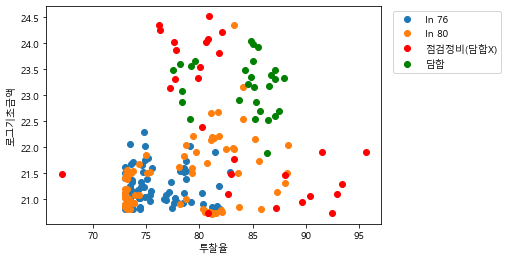

In [ ]:
import matplotlib.pyplot as plt

plt.plot('tenderRatio', 'LnCash', 'o' ,data=in76, label = 'In 76')
plt.plot('tenderRatio', 'LnCash', 'o' ,data=in80, label = 'In 80')
plt.plot('tenderRatio', 'LnCash', 'or' ,data=main, label = '점검정비(담합X)')
plt.plot('tenderRatio', 'LnCash', 'og', data=coll, label = '담합')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.374, 1))
plt.xlabel('투찰율')
plt.ylabel("로그기초금액")

In [ ]:
df_156 = df_temp6.loc[(df_temp6['dmaintain'] == 0 ) & (df_temp6['Collusion'] == 0)]
df_156.shape # 156
df_temp1.shape # 76

(76, 3)

In [ ]:
df_80 = df_156.loc[~df_156['공고번호'].isin(df_temp1['입찰공고번호'])]
df_80.shape

(80, 25)

In [ ]:
qq= asd.loc[~asd['공고번호'].isin(df_temp1['입찰공고번호'])]

In [ ]:
np.mean(qq['tenderRatio'])

80.50714989097985

In [ ]:
(~df_temp1['입찰공고번호'].isin(asd['공고번호'])).sum()

0

In [ ]:
df_temp1.loc[~df_temp1['입찰공고번호'].isin(asd['공고번호'])]

,tenderRatio,입찰공고번호


In [ ]:
asd.loc[asd['공고번호'].str.contains('2013-0559')]

,낙찰율(예대),Collusion,기초금액,dnumfirm2,d2011,d2012,d2013,d2014,d2015,d2016,d2017,d2018,d2019,d2020,d33,d66,dmaintain,공고번호,tenderRatio,LnCash,db2013,db2014,db2017_a,db2017_b
88,0.74407,0,1364000000,5.00000,0,0,1,0,0,0,0,0,0,0,1,0,0,2013-0559,74.40734,21.03369,1,1,0,0


In [ ]:
df_temp1.loc[df_temp1['입찰공고번호'] == '2013-0559']

,tenderRatio,입찰공고번호


In [ ]:
asd.loc[asd['공고번호'] == '2011-0107']

,낙찰율(예대),Collusion,기초금액,dnumfirm2,d2011,d2012,d2013,d2014,d2015,d2016,d2017,d2018,d2019,d2020,d33,d66,dmaintain,공고번호,tenderRatio,LnCash,db2013,db2014,db2017_a,db2017_b


In [ ]:
asd

,낙찰율(예대),Collusion,기초금액,dnumfirm2,d2011,d2012,d2013,d2014,d2015,d2016,d2017,d2018,d2019,d2020,d33,d66,dmaintain,공고번호,tenderRatio,LnCash,db2013,db2014,db2017_a,db2017_b
2,0.77106,0,1514040000,3.00000,1,0,0,0,0,0,0,0,0,0,0,1,0,2010-1774,77.10555,21.13805,1,1,0,0
8,0.76853,0,1429000000,2.00000,1,0,0,0,0,0,0,0,0,0,0,1,0,2011-0647,76.85339,21.08024,1,1,0,0
9,0.74321,0,1346000000,2.00000,1,0,0,0,0,0,0,0,0,0,1,0,0,2011-0648,74.32124,21.02040,1,1,0,0
13,0.81166,0,1140700000,2.00000,1,0,0,0,0,0,0,0,0,0,1,0,0,2011-1191,81.16553,20.85491,1,1,0,0
35,0.81964,0,1103520000,2.00000,0,1,0,0,0,0,0,0,0,0,1,0,0,2011-2204,81.96406,20.82177,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,0.79326,0,2213000000,3.00000,0,0,0,0,0,0,0,0,0,0,0,1,0,B5202104046,79.32577,21.51761,0,0,0,0
592,0.81056,0,4138800000,2.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,B5202104171,81.05565,22.14367,0,0,0,0
593,0.81866,0,4442000000,2.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,B5202104172,81.86577,22.21437,0,0,0,0
594,0.82457,0,3507000000,2.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,B5202104173,82.45703,21.97803,0,0,0,0
